클러스터링
$1.\text{클러스터링이란 무엇인가?}$

주어진 데이터들을 적절하게 군집화 하는 알고리즘을 말한다.<br>
새로운 군집 내의 데이터 값을 분석하고 이해함으로서 이 집단에 새로운 의미를 부여할 수 있고 전체 데이터를 다각도로 살펴볼 수 있다.<br>


$2.\text{K-means clustering}$<br>

클러스터링 모델의 대표적인 종류로서 K-means에 대해서 알아보자.<br>
간단하게 정의한다면 "K개의 평균값을 중심으로 해서 데이터를 클러스터링(군집화) 시키자!" 로 직관적으로 이해하면 되겠다.<br>
그렇다면 가장 적절한 K값은 어떻게 결정해주어야 할까? 이 때 우리가 할 일이 나타나게 된다. 바로 이 최적의 'K' 값을 찾아주는 것!<br>
![title](../photo/Kmens.png)<br>

$2-1. \text{K-means 알고리즘}$
최적의 K값을 찾아주기 위해서 사용되는 알고리즘이 존재한다. 알고리즘은 다음 4가지의 단계로 iterative(반복적으로)하게 진행되며 최적의 K값을 찾아준다.

 

임의의 K값을 초기값으로 설정하고 K개의 군집 중심을 선택한다.

각 데이터와 각 K개의 중심과 거리가 얼마인지 계산하고 가장 가까운 중심을 선택한다.

군집 중심을 다시 Update한다.

할당된 데이터의 군집이 군집 중심을 업데이트 하기 전, 후로 변경되지 않을 때까지 2,3번째 단계를 반복한다.


In [14]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
sys.path.insert(0, str(Path(r'D:\OneDrive\Documents\SJTU 과제\기계학습(머신러닝)\Machine_Learning\MyPackage\CHAE_ML.py').resolve().parent.parent))
from MyPackage import CHAE_ML
df = pd.read_csv('../iris.data')
df.reset_index(drop=True, inplace=True)
#df.info()
m, n = df.shape
print('Number of training examples m = ', m)
print('Number of features n = ', n - 1)
df.head()

Number of training examples m =  150
Number of features n =  4


,sepal.lenth,sepal.width,petal.lenth,petal.width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


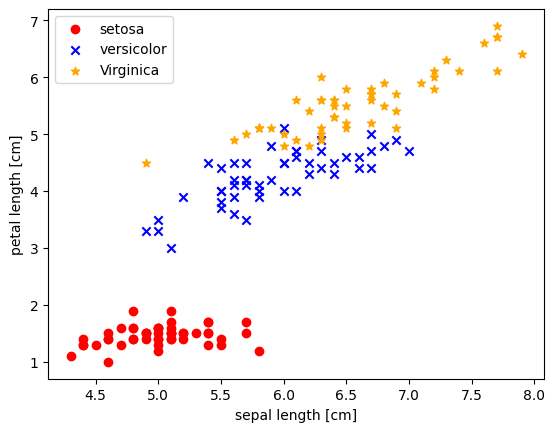

In [15]:
y = df.iloc[0:150, 4].values
#y = np.where(y == '0', -1, 1)
# 꽃받침 길이와 꽃잎 길이를 추출합니다
x = df.iloc[:, [0, 2]].values
#print(x)
#print(y)
# 산점도를 그립니다, setosa-음성, versicolor-양성
plt.scatter(x[:50, 0], x[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.scatter(x[100:, 0], x[100:, 1],
            color='orange', marker='*', label='Virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

일단 기본적인 데이터의 분산도를 가져 와봤다. 최종적으로 이 데이터와 가장 닮은 데이터셋을 추정할 수 있는게 K mean 알고리즘의 핵심이라 할 수 있겠다.

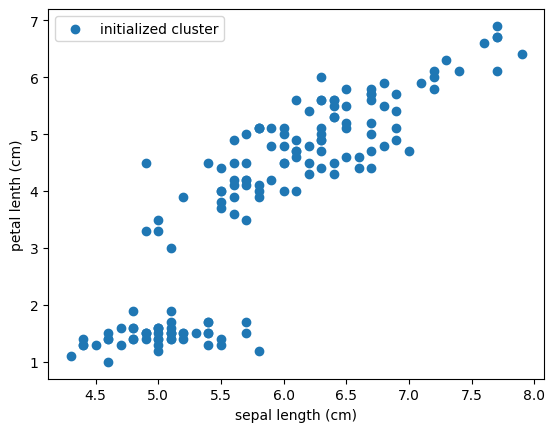

In [16]:
# x1 = df.iloc[:, 0].values
# y1 = df.iloc[:, 2].values
sepal_len = x[:,0]
petal_len = x[:,1]
plt.scatter(sepal_len, petal_len,label='initialized cluster')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal lenth (cm)')
plt.legend(loc='upper left')
plt.show()

STEP 1: K개의 random Centroids 지정
제일 먼저 K 개의 centroids를 임의로 지정해보자. 이 때 3가지 종이 존재하므로 K 는 3 으로 설정해보자.

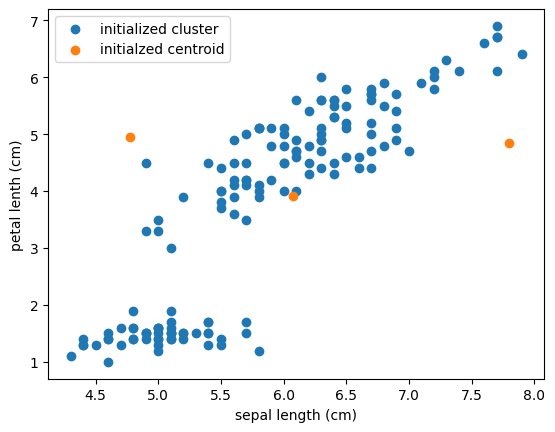

In [24]:
k=3

centroids_x = np.random.uniform(min(sepal_len), max(sepal_len), k)
centroids_y = np.random.uniform(min(petal_len), max(petal_len), k)
centroids = np.array(list(zip(centroids_x, centroids_y)))

plt.scatter(sepal_len, petal_len,label='initialized cluster')	# 데이터들은 파란색으로 표시되고
plt.scatter(centroids_x, centroids_y,label='initialzed centroid')	# centroids는 주황색으로 표시됩니다
plt.xlabel('sepal length (cm)')
plt.ylabel('petal lenth (cm)')
plt.legend(loc='upper left')
plt.show()

STEP 2: Assign Datas to Nearest Centroid
Centroids를 지정하고 이제 해당 centroids에 가까운 데이터들을 할당하자.<br>
이 때 ‘가깝다’ 라는 것을 정량적으로 계산하기 위해 각 데이터를 벡터로 간주하여 유클리드 거리를 계산해보자.<br>

Euclidian distance<br>
$d(a,b) = \sqrt{(a_1 - b_1)^2 + (a_2 - b_2)^2 + \cdots + (a_n - b_n)^2}$

In [18]:
def distance(a, b):
    #sum([np.sqrt((ed_a - ed_b)**2) for ed_a, ed_b in list(zip(a, b))])
    return np.sqrt(np.sum((a - b)**2))
     

In [25]:
""" 
logic
1.take every dataset of iris data
2.take features from dataset (x,y)
3.compare euclidian distance (x,y) and cluster k1,k2,..kn
4.find minimum index of datasets
5.add minimum index to label
"""
# 각 데이터 포인트를 그룹화 할 labels을 생성합니다 (0, 1, 또는 2)
def clustering(data,K):
  labels = np.zeros(len(data))
  features = np.array(list(zip(data[:,0], data[:,1])))#septal, petal lenth
  # 각 데이터를 순회하면서 centroids와의 거리를 측정합니다
  for i in range(len(data)):
    distances = np.zeros(K)	# 초기 거리는 모두 0으로 초기화 해줍니다
    for j in range(K):
      distances[j] = distance(features[i], centroids[j])
    cluster = np.argmin(distances)	# np.argmin은 가장 작은 값의 index를 반환합니다
    labels[i] = cluster
  return labels

클러스터링 결과 확인:<br>
클러스터링 결과를 확인할 수 있습니다. 이 결과를 바탕으로 산점도를 그려보겠습니다.

coordinate of centroid: [4.77099119 7.79610775 6.07528029] [4.94724303 4.84505584 3.91198112]


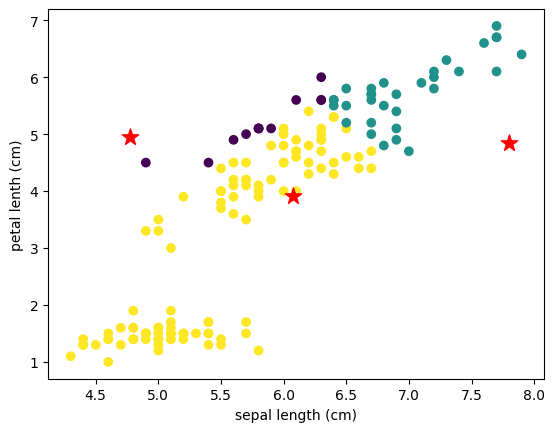

In [26]:
clust_result = clustering(x,k)
plt.scatter(sepal_len, petal_len, c=clust_result )
plt.scatter(centroids_x, centroids_y, c='red',marker="*",s=150,label='updated centorids')	# centroid는 빨간색으로 나타냅니다
print("coordinate of centroid:", centroids_x, centroids_y)
plt.xlabel('sepal length (cm)')
plt.ylabel('petal lenth (cm)')
plt.show()

시작 centroids 가 무작위이기 때문에 나쁜 결과는 아니지만 이상적인 결과는 아닌 것 같습니다.<br>
controids를 업데이트 해서 어떤 결과가 나오는지 보겠습니다.

In [27]:
from copy import deepcopy
centroids_old = deepcopy(np.array(centroids))
print(type(centroids_old))
print(centroids_old)
def centroid_update(data,clusters,K):
  features = np.array(list(zip(data[:,0], data[:,1])))#septal, petal lenth
  centroids_updated=[]
  for i in range(K):
    # 각 그룹에 속한 데이터들만 골라 points에 저장합니다
    points = [ features[j] for j in range(len(features)) if clusters[j] == i ]
    #print(points)
    # points의 각 feature, 즉 각 좌표의 평균 지점을 centroid로 지정합니다
    centroids_updated.append(np.mean(points, axis=0))
  return centroids_updated 

<class 'numpy.ndarray'>
[[4.77099119 4.94724303]
 [7.79610775 4.84505584]
 [6.07528029 3.91198112]]


updated centroids:  [[5.825     5.175    ]
 [6.9875    5.74375  ]
 [5.5       2.9990566]]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 2. 2. 1. 0. 0. 2. 1. 1. 1. 2.
 1. 0. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 0. 1. 0. 1. 2. 1. 1. 1. 0. 1.
 1. 1. 2. 1. 2. 0.]
[[4.77099119 4.94724303]
 [7.79610775 4.84505584]
 [6.07528029 3.91198112]]


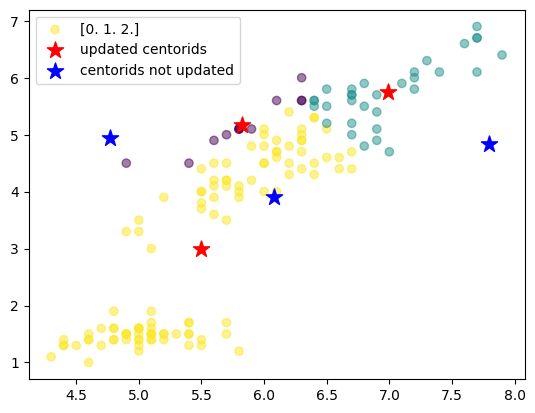

In [28]:
centroids_updated = np.array(centroid_update(x,clust_result,k))
print("updated centroids: ",np.array(centroids_updated))
print(clust_result)
print(centroids_old)
unique_values = np.unique(clust_result)
centroids_updated =np.array(centroids_updated)
plt.scatter(sepal_len, petal_len, c=clust_result, alpha=0.5,label=unique_values)
plt.scatter(centroids_updated[:,0],centroids_updated[:,1], c='red',marker="*",s=150,label='updated centorids')
plt.scatter(centroids_old[:,0],centroids_old[:,1], c='b',marker="*",s=150,label='centorids not updated')

plt.legend(loc='upper left')
plt.show()

중심지점을 찾아서 다시 플로팅하니 기존 데이터 세트와 상당히 유사한것을 볼 수 있습니다.<br>
이제 데이터셋을 업데이트 하며 최적화된 centroids를 찾아봅시다.

In [29]:
def Kmeans_plus(data,centroids,K):
  centroids_old = np.zeros(np.array(centroids).shape)	# 제일 처음 centroids_old는 0으로 초기화 해줍니다
  centroids_updated = deepcopy(centroids)
  labels = np.zeros(len(data))
  print("K=",K)
  error = np.zeros(K)
  # error 도 초기화 해줍니다
  for i in range(K):
    error[i] = distance(centroids_old[i], centroids_updated[i]) #centroid old랑 centrod i를 업데이트 
  # STEP 4: error가 0에 수렴할 때 까지 2 ~ 3 단계를 반복합니다
  while(error.all() != 0):
    # STEP 2: 가까운 centroids에 데이터를 할당합니다
    labels = clustering(data,K)
    # Step 3: centroids를 업데이트 시켜줍니다
    centroids_old = deepcopy(centroids_updated)
    centroids_updated = centroid_update(data,labels,K)
    # 새롭게 centroids를 업데이트 했으니 error를 다시 계산합니다
    for i in range(K):
      error[i] = distance(centroids_old[i], centroids_updated[i])
    #print(error)
  return centroids_updated,labels,error

K= 3
[array([5.825, 5.175]), array([6.9875 , 5.74375]), array([5.5      , 2.9990566])]
[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 2. 2. 1. 0. 0. 2. 1. 1. 1. 2.
 1. 0. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 0. 1. 0. 1. 2. 1. 1. 1. 0. 1.
 1. 1. 2. 1. 2. 0.]
[0. 0. 0.]


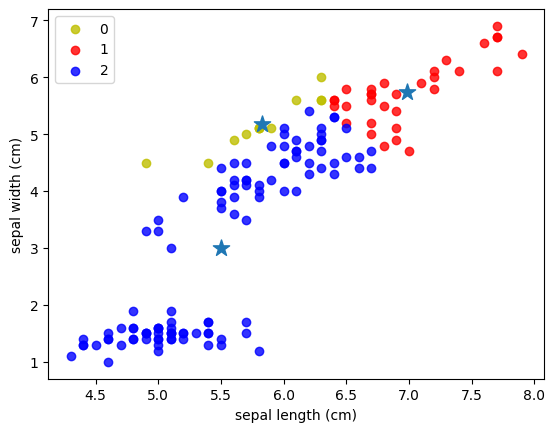

In [30]:
cent_up , labels,error = Kmeans_plus(x,centroids,k)
print(cent_up)
print(labels)
print(error)
colors = ['y', 'r', 'b']
cent_up = np.array(cent_up)
for i in range(k):
    points = np.array([x[j] for j in range(len(x)) if labels[j] == i])
    plt.scatter(points[:, 0], points[:, 1], alpha=0.8,c=colors[i],label=str(i))

plt.scatter(cent_up[:, 0], cent_up[:, 1], marker='*', s=150)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(loc='upper left')

plt.show()

![title](../photo/kmeans_origin.png)

In [ ]:
print(labels)
#reverse_labels = reversed(labels)
print(np.array(df.iloc[:,-1]))
valid = pd.DataFrame({'labels': labels,'type': np.array(df.iloc[:,-1])})
#print(df.iloc[:,-1])
ct = pd.crosstab(valid['labels'], valid['type'])
print(ct)

#0 Virginica 1 versicolor 2 setosa

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
type     0   1   2
labels            
0.0      1   0   0
1.0      0  46  50
2.0     49   4   0


Virginica는 74% versicolor는 90% setora는 100% 분류되었다.<br>
이제 중요한건 최적의 클러스터 개수를 찾는거라고 할 수 있다.<br>

$2-2. \text{최적의 초기 Cluster 개수(K값) 설정}$
초기값을 설정하기 위해서는 '관점'에 따라 방법이 달라지는데, 다음과 같은 방법들이 존재한다.

Hierarchical Clustering : 완전 밑바닥부터 끝까지 bottom-up 방식으로 모두 계층화시킨다.

WCSS(Elbow-method) : 여러 후보 k값들 중 적절함을 평가하고 적절한 초기값을 선정한다. 이때 적절함을 평가하는 척도는 예를들어 군집 중심으로부터 거리를 계산하는 등 다양한 방법 중 선택한다.
이 방법은 Grid-search 처럼 일일이 시행하면서 최적의 k의 초기값을 설정한다.
WCSS= ∑Pi in Cluster1 distance (Pi C1)2 +∑Pi in Cluster2distance (Pi C2)2+∑Pi in CLuster3 distance (Pi C3)2

Information Criterion Approach : 클러스터링 모델에 대해 likelihood(조건부확률)을 점수로 계산한다. K-means의 경우에는 Gaussian Mixture model을 활용해 likelihood를 계산한다.

Rule of thumb : 간단한 공식을 따른다. 공식은 바로 하단의 그림이다. 이 때 n은 데이터의 개수이다.<br>
$k=\sqrt{n/2}$

WCSS를 이용해서 문제를 풀기 위해 함수를 미리 지정해서 만들면 좋으니 지금까지 만든 함수들을 이용해 클래스로 구현 후 마무리 하겠다.